## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter("ignore")
from statistics import mean
from statistics import median
from numpy import NAN

In [ ]:
# посмотр, где находится каталог с файлами на COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# получение доступа к каталогу и уточнение названия папок
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 1')

['games.csv', 'Сборный проект №1.ipynb', 'ПРАВКА', 'GitHub']

In [ ]:
# загрузка данных
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 1/games.csv')

In [ ]:
# посмотрим типы данных и кол-во ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head(15)

Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon Silver       GB           1999.0  Role-Playing   
13                      Wii Fit      Wii           2007.0        Sports   
14           Kinect Adventures!     X360           2010.0          Misc   

    NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0      41.36     28.96      3.77         8.45          76.0          8      E  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2      15.68     12.76      3.79         3.29          82.0        8.3      E  
3      15.61     10.93      3.28         2.95          80.0          8      E  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6      11.28      9.14      6.50         2.88          89.0        8.5      E  
7      13.96      9.18      2.93         2.84          58.0        6.6      E  
8      14.44      6.94      4.70         2.24          87.0        8.4      E  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN  
11      9.71      7.47      4.13         1.90          91.0        8.6      E  
12      9.00      6.18      7.20         0.71           NaN        NaN    NaN  
13      8.92      8.03      3.60         2.15          80.0        7.7      E  
14     15.00      4.89      0.24         1.69          61.0        6.3      E

In [ ]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [ ]:
# посчитать пропущенные данные
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# подсчет доли дубликатов
print(data.duplicated().sum() / len(data) * 100)

0.0


### Вывод

Проблемы с данными, следующие:

1. name - пропущены 2 значения;
2. year_of_release - пропущено 269 значений и должен быть тип datetime;
3. genre - пропущены 2 значения; 
4. critic_score - пропущено 8578 значений;
5. user_score - пропущено 6701 значений и должен быть тип float;
6. rating - пропущено 6766 значений.


## Предобработка данных

### Устранение проблем в столбце year_of_release

In [ ]:
# проверим по датам, сколько месяцев охватывают данные
print(data['year_of_release'].min(), data['year_of_release'].max())

1980.0 2016.0


In [ ]:
# просмотр описательной статистики
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [ ]:
# вывод уникальных значений
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
# доля пропущенных значений
data['year_of_release'].isna().mean()

0.01609332934489979

Доля пропущенных значений превышает 1%, но всего лишь на 0.6, поэтому все-таки удалим пропуски.

In [ ]:
# удаление пропусков
data = data.dropna(subset=['year_of_release'])

In [ ]:
# привести значения столбца к 'int'

warnings.simplefilter("ignore")
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Устранение проблем в столбце critic_score

In [ ]:
# просмотр описательной статистики
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [ ]:
data['critic_score'].median()

71.0

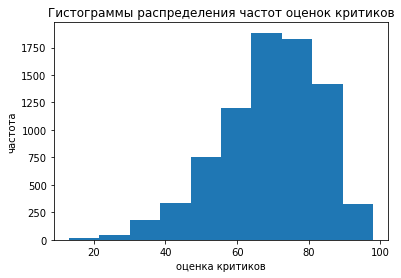

In [ ]:
# просмотр гистограммы распределения частот встречающихся значений

data['critic_score'].sort_values().plot(y = 'critic_score', kind = 'hist')
plt.title(label='Гистограммы распределения частот оценок критиков')
plt.xlabel("оценка критиков")
plt.ylabel("частота");

In [ ]:
# доля пропущенных значений
data['critic_score'].isna().mean()

0.5145932141554177

Доля пропусков порядка 51 %. Медиана больше среднего - распределение смещено влево и имеет нормальный вид, без аномальных выбросов. Оставим данные с пропусками, так как заполнение более 50% средними значениями или нулевыми приведет к сильному искажению формы нормального распределения и, в целом, повлияет на объективность в данных.

### Устранение проблем в столбце user_score

In [ ]:
# просмотр описательной статистики
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [ ]:
# вывод уникальных значений
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# доля пропущенных значений
data['user_score'].isna().mean()

0.40173902468685396

Доля пропусков порядка 40%. Кроме того, аббревиатура 'tbd' (to be defined) означает - данные скоро будут обнародованы, но для нас это все равно, что пропуск. Заменим 'tbd' пропусками "nan" и приведем в числовой тип данные (float).

In [ ]:
# замена 'tbd' на "NAN"
data.loc[(data.user_score == 'tbd'), 'user_score'] = NAN


In [ ]:
# вывод уникальных значений
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
# преобразование в 'float'
data['user_score'] = data['user_score'].astype('float')

In [ ]:
# просмотр описательной статистики
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [ ]:
data['user_score'].median()

7.5

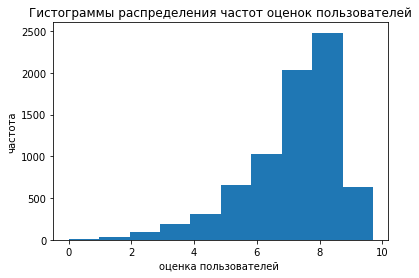

In [ ]:
# просмотр гистограммы распределения частот встречающихся значений

data['user_score'].sort_values().plot(y = 'user_score', kind = 'hist')
plt.title(label='Гистограммы распределения частот оценок пользователей')
plt.xlabel("оценка пользователей ")
plt.ylabel("частота");

In [ ]:
# доля пропущенных значений
data['user_score'].isna().mean()

0.5462118448254895

В результате обработки доля пропусков еще увеличилась на 15 %, однако появилась возможность анализа средних, медианных значений выборки, а также ее частотного распределения.

### Устранение проблем в столбце rating

In [ ]:
# просмотр описательной статистики
data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [ ]:
# вывод уникальных значений
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
# доля пропущенных значений
data['rating'].isna().mean()

0.4060561838744984

Доля пропусков порядка 41 %. Переменная относится к типу категориальных. Заполним пропуски значением "unknown".

In [ ]:
# заполнение пропусков
data['rating'] = data['rating'].fillna('unknown')

In [ ]:
# доля пропущенных значений
data['rating'].isna().mean()

0.0

### Устранение проблем в столбце genre

In [ ]:
# просмотр описательной статистики
data['genre'].describe()

count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object

In [ ]:
# вывод уникальных значений
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# доля пропущенных значений
data['genre'].isna().mean()

0.00012161011796181443

Доля пропусков менее 1 %. Удалим пропуски.


In [ ]:
# удаление пропусков
data = data.dropna(subset=['genre'])

In [ ]:
# доля пропущенных значений
data['genre'].isna().mean()

0.0

### Устранение проблем в столбце name 

In [ ]:
# просмотр описательной статистики
data['name'].describe()

count                           16444
unique                          11426
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [ ]:
# вывод уникальных значений
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [ ]:
# доля пропущенных значений
data['name'].isna().mean()

0.0

### Контрольная проверка результатов предобработки

In [ ]:
# контрольная проверка на пропуски
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [ ]:
# контрольная проверка типов данных и кол-ва ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
0            E  
1      unknown  
2            E  
3            E  
4      unknown  
...        ...  
16710  unknown  
16711  unknown  
16712  unknown  
16713  unknown  
16714  unknown  

[16444 rows x 11 columns]

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16440               LMA Manager 2007     X360             2006        Sports   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16442               Spirits & Spells      GBA             2003      Platform   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16440      0.00      0.01      0.00         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16442      0.01      0.00      0.00         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
0            E  
1      unknown  
2            E  
3            E  
4      unknown  
...        ...  
16439  unknown  
16440  unknown  
16441  unknown  
16442  unknown  
16443  unknown  

[16444 rows x 11 columns]

### Расчёты и добавление результатов в таблицу

In [ ]:
# формируем столбец и округляем в нем значения до сотых
data['total_sales'] = round((data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']), 2)

In [ ]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

### Вывод

**В результате предобработки, установлено и выполнено следующие:**

1. Изменены названия столбцов (приведите к нижнему регистру).
2. Преобразованы данные в столбце "year_of_release" и "user_score" в тип int64 и float64 соответственно.
3. Удалены пропуски по столбцам "name" и "genre" (доля пропусков менне 1 %).
4. В столбце "rating" заполнены пропуски значением "unknown", так как переменная относится к типу категориальных и доля пропусков порядка 41 %.
5. В столбце "user_score" доля пропусков сначала составляла порядка 54 %.  Обнаруженные значения 'tbd' (to be defined - данные скоро будут обнародованы) были заполнены пропусками "NAN". В результате доля пропусков еще увеличилась на 15 %, однако появилась возможность анализа средних, медианных значений выборки, а также ее частотного распределения. Также необходимо отметить, что внесенные изменения в целом, не повлияли на объективность в данных.
6. В столбце "critic_score" доля пропусков составила порядка 51 %. Медиана больше среднего - распределение смещено влево и имеет нормальный вид, без аномальных выбросов. Оставим данные с пропусками как есть, так как заполнение более 50% средними значениями или нулевыми приведет к сильному искажению формы нормального распределения и, в целом, повлияет на объективность в данных.
7. Добавлен столбец "total_sales" - показывающий суммарные продажи во всех регионах.


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [ ]:
# формируем сводную таблицу
data_pivot_year_of_release = data.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'count')

In [ ]:
# переименование столбцов сводной таблицы
data_pivot_year_of_release.columns = ['game_release_count']

In [ ]:
# вывод сводной таблицы
data_pivot_year_of_release

game_release_count
year_of_release                    
1980                              9
1981                             46
1982                             36
1983                             17
1984                             14
1985                             14
1986                             21
1987                             16
1988                             15
1989                             17
1990                             16
1991                             41
1992                             43
1993                             60
1994                            121
1995                            219
1996                            263
1997                            289
1998                            379
1999                            338
2000                            350
2001                            482
2002                            829
2003                            775
2004                            762
2005                            939
2006                           1006
2007                           1197
2008                           1427
2009                           1426
2010                           1255
2011                           1136
2012                            653
2013                            544
2014                            581
2015                            606
2016                            502

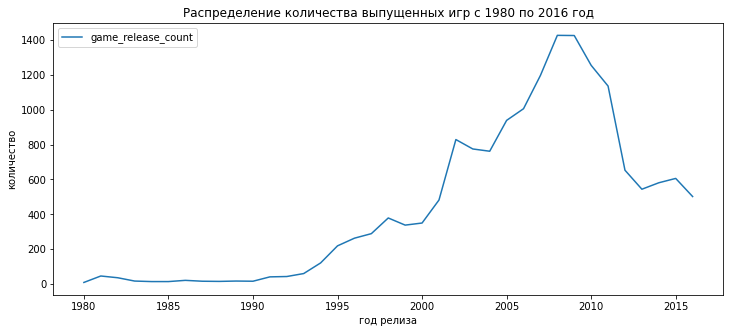

In [ ]:
# график по годам и количеству релизов
data_pivot_year_of_release.plot(figsize=(12, 5))
plt.title(label='Распределение количества выпущенных игр с 1980 по 2016 год')
plt.xlabel("год релиза")
plt.ylabel("количество");

In [ ]:
# просмотр описательной статистики сводной таблицы
data_pivot_year_of_release.describe()

game_release_count
count           37.000000
mean           444.432432
std            451.604334
min              9.000000
25%             36.000000
50%            338.000000
75%            762.000000
max           1427.000000

In [ ]:
# год с минимальным количеством релизов
year_of_release_min = data_pivot_year_of_release[data_pivot_year_of_release['game_release_count'] == 9]
year_of_release_min

game_release_count
year_of_release                    
1980                              9

In [ ]:
# год с максимальным количеством релизов
year_of_release_max = data_pivot_year_of_release[data_pivot_year_of_release['game_release_count'] == 1427]
year_of_release_max

game_release_count
year_of_release                    
2008                           1427

#### Вывод

1. На протяжении периода с 1980 по 2008 годы наблюдался рост выпускаемых релизов с 9 до 1427. 
2. В период с 2008 по 2016 годы начался спад. Количество выпускаемых в год релизов снизилось до 502.
3. Среднее количество релизов, выпускаемых в год, составляет порядка 444.

### Как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределение по годам. Характерный срок появлия новых и исчезания старых платформ

In [ ]:
# формируем сводную таблицу
data_pivot_platform = data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')

In [ ]:
# переименование столбца сводной таблицы
data_pivot_platform.columns = ['total_sales_platform']

In [ ]:
# вывод отсортированного списка
data_pivot_platform.sort_values(by='total_sales_platform', ascending=False).head(10)

total_sales_platform
platform                      
PS2                    1233.56
X360                    961.24
PS3                     931.34
Wii                     891.18
DS                      802.78
PS                      727.58
PS4                     314.14
GBA                     312.88
PSP                     289.53
3DS                     257.81

#### TOP-10 platform

In [ ]:
# формируем список TOP-10 платформ
list_top_10 = data_pivot_platform.sort_values(by='total_sales_platform', ascending=False).head(10).reset_index()
list_top_10 = list_top_10['platform'].unique()
list_top_10

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

In [ ]:
# функция вывода графиков жизненного цикла платформ
def print_top_life_cycle(list_top):
    for list in list_top:
        df_pl = data.query('platform == list')
        df_pl_pivot = df_pl.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'count')
        df_pl_pivot.columns = [list]
        df_pl_pivot.plot()
        plt.xlabel("год релиза")
        plt.ylabel("количество релизов")

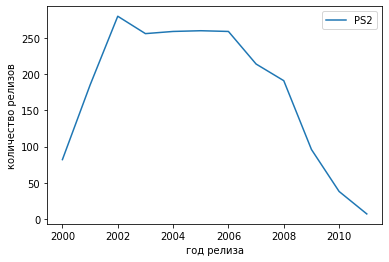

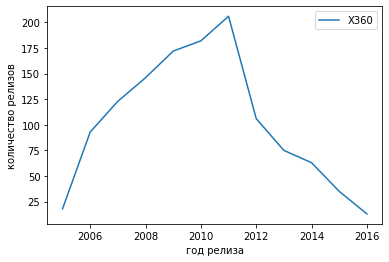

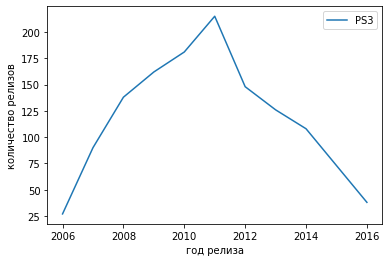

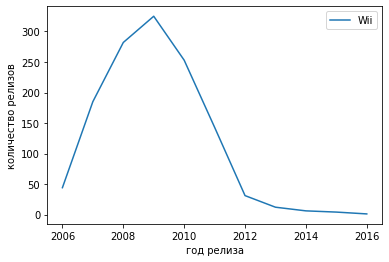

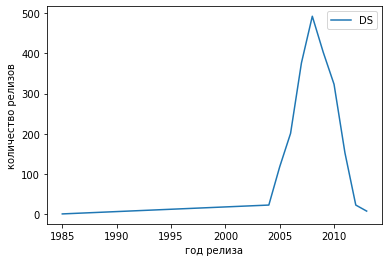

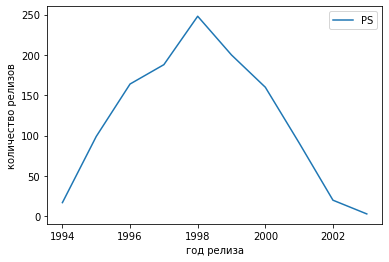

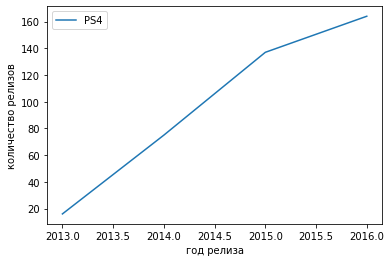

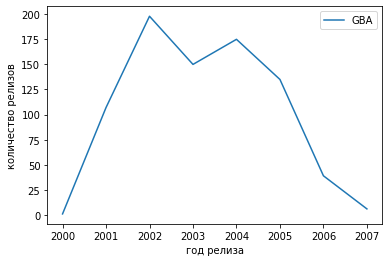

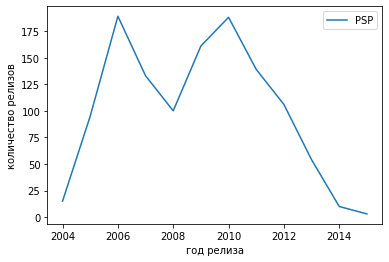

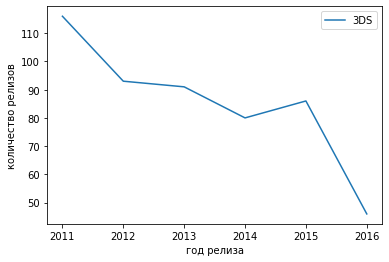

In [ ]:
print_top_life_cycle(list_top_10)

#### Среднее и медианное количество лет существования платформ

In [ ]:
# функция подсчета среднего и медианного значения жизненного цикла платформ
def mean_life_cycle_platform(list_top):
    life_cycle_platform = []
    for list in list_top:
        df_pl = data.query('platform == list')
        life_cycle_platform.append(df_pl['year_of_release'].max() - df_pl['year_of_release'].min())
        
    mean_life_cycle_platform = mean(life_cycle_platform)
    median_life_cycle_platform = median(life_cycle_platform)
    print('Среднее значение жизненного цикла платформы равно', mean_life_cycle_platform)
    print('Медианное значение жизненного цикла платформы равно', median_life_cycle_platform)

In [ ]:
mean_life_cycle_platform(list_top_10)

Среднее значение жизненного цикла платформы равно 10.5
Медианное значение жизненного цикла платформы равно 10.0


#### Вывод

1. В TOP-10 platform с наибольшими суммарными продажами входят:
    *   PS2
    *   X360
    *   PS3
    *   Wii
    *   DS
    *   PS
    *   PS4
    *   GBA
    *   PSP
    *   3DS
2. Среднее количество лет существования платформ - 10.5
3. Медианное количество лет существования платформ – 10.


### Прогноз на 2017 год

#### Потенциально прибыльные платформы

В предыдущем подразделе было установлено, что медианное время существования платформы составляет порядка 10 лет. Исходя из этого пик продаж приходится, примерно, на 4-6 годы. Таким образом, проанализировав количество релизов, вышедших за последние 4 года, можно обнаружить либо трен роста, который говорит о потенциальной прибыльности платформы, либо трен снижения, говорящий об обратном.

In [ ]:
# срез по годам
data_promis = data.query('year_of_release >= 2013')
data_promis.head()

name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   
42      3.96      6.31      0.38         1.97          97.0         8.3   

     rating  total_sales  
16        M        21.05  
23        M        16.27  
31  unknown        14.63  
33  unknown        14.60  
42        M        12.62

In [ ]:
# формируем сводную таблицу
data_promis_pivot = data_promis.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')

In [ ]:
# переименование столбцов сводной таблицы
data_promis_pivot.columns = ['total_sales_platform']

In [ ]:
# вывод отсортированного списка
data_promis_pivot.sort_values(by='total_sales_platform', ascending=False).head(10)

total_sales_platform
platform                      
PS4                     314.14
PS3                     181.43
XOne                    159.32
3DS                     143.25
X360                    136.80
WiiU                     64.63
PC                       39.43
PSV                      32.99
Wii                      13.66
PSP                       3.50

In [ ]:
# check

(
    data_promis
    .pivot_table(index = ['platform'], columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .fillna(0)
    .T
)

platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU  \
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76  0.00  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78  0.00   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14  0.00   5.25    3.60   69.25  0.00   4.25  0.18   4.60   

platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

In [ ]:
# check

(
    data_promis
    .pivot_table(index = ['platform'], columns = 'year_of_release', values = 'total_sales', aggfunc = 'count')
    .fillna(0)
    .T
)

platform          3DS   DS    PC    PS3    PS4   PSP    PSV   Wii  WiiU  X360  \
year_of_release                                                                 
2013             91.0  8.0  38.0  126.0   16.0  54.0   63.0  12.0  42.0  75.0   
2014             80.0  0.0  47.0  108.0   75.0  10.0  100.0   6.0  31.0  63.0   
2015             86.0  0.0  50.0   73.0  137.0   3.0  110.0   4.0  28.0  35.0   
2016             46.0  0.0  54.0   38.0  164.0   0.0   85.0   1.0  14.0  13.0   

platform         XOne  
year_of_release        
2013             19.0  
2014             61.0  
2015             80.0  
2016             87.0

In [ ]:
# формируем список потенциально прибыльных платформ
list_promis = data_promis_pivot.sort_values(by='total_sales_platform', ascending=False).head(10).reset_index()
list_promis = list_promis['platform'].unique()
list_promis

array(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP'], dtype=object)

In [ ]:
# функция вывода графиков потенциально прибыльных платформ
def print_promis_platform(list_top):
    for list in list_top:
        df_pl = data_promis.query('platform == list')
        df_pl_pivot = df_pl.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'count')
        df_pl_pivot.columns = [list]
        df_pl_pivot.plot(figsize=(9, 4))
        plt.xlabel("год релиза")
        plt.ylabel("количество релизов")

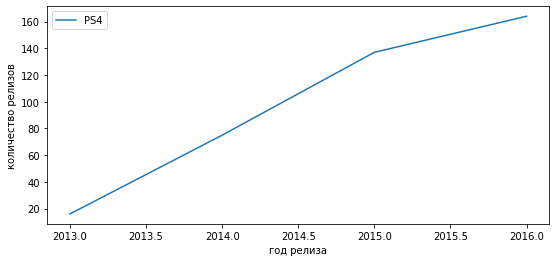

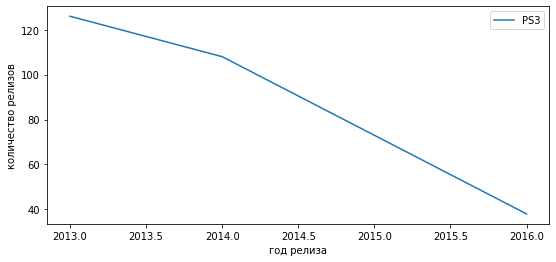

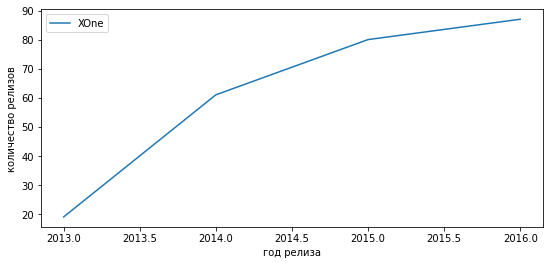

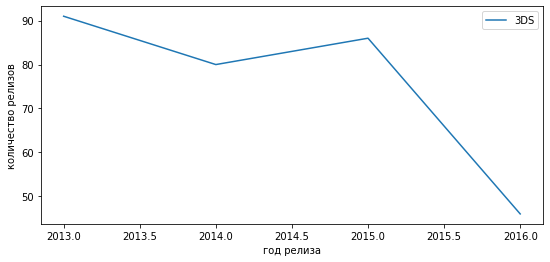

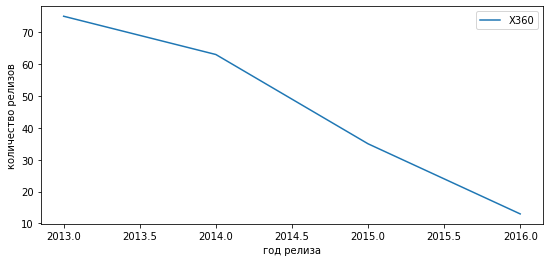

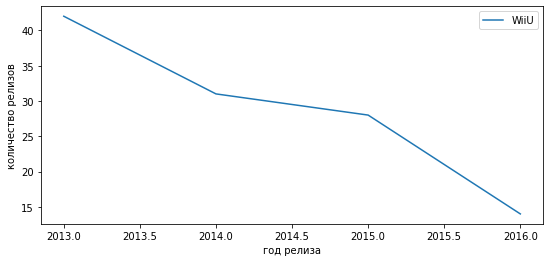

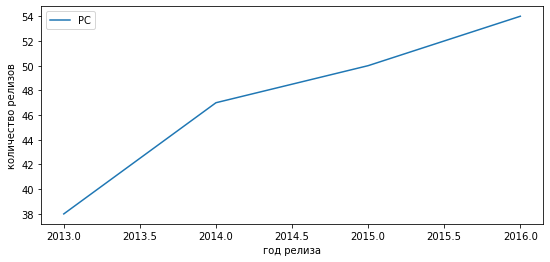

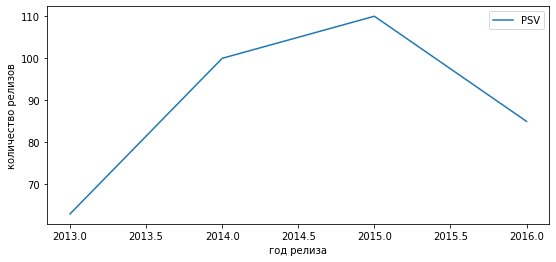

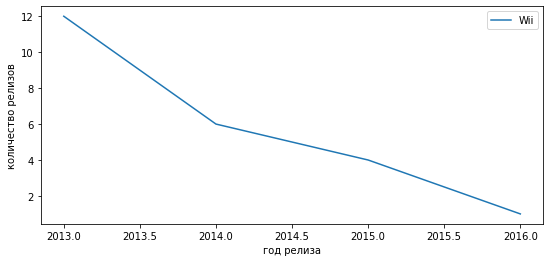

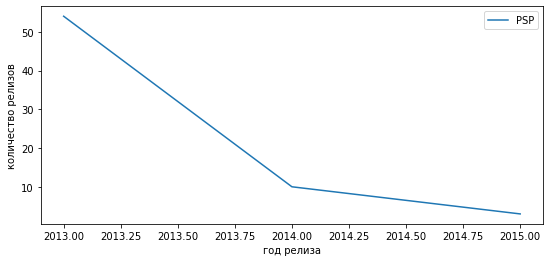

In [ ]:
print_promis_platform(list_promis)

#### Вывод

1. К платформам, "растущим" по продажам можно отнести:
    *   PS4
    *   XOne
    *   PC
    *   PSV (с 2015 наметилась тенденция к снижению, возможен второй "гребень" роста, однако и возможно, что тенденция "падения" продолжится)
2. К платформам, "падающим" по продажам можно отнести:
    *   PS3
    *   3DS
    *   X360
    *   WiiU
    *   Wii
    *   PSP
3. К потенциально прибыльным платформам можно отнести:
    *   PS4
    *   XOne
    *   PC

### «Ящик с усами» 

In [ ]:
# формируем сабсет из 6 платформам списка "TOP-10" и 4 платформ списка потенциально прибыльных "promis"
data_TOP_6_promis_4 = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "XOne", "PC", "PSV"]')

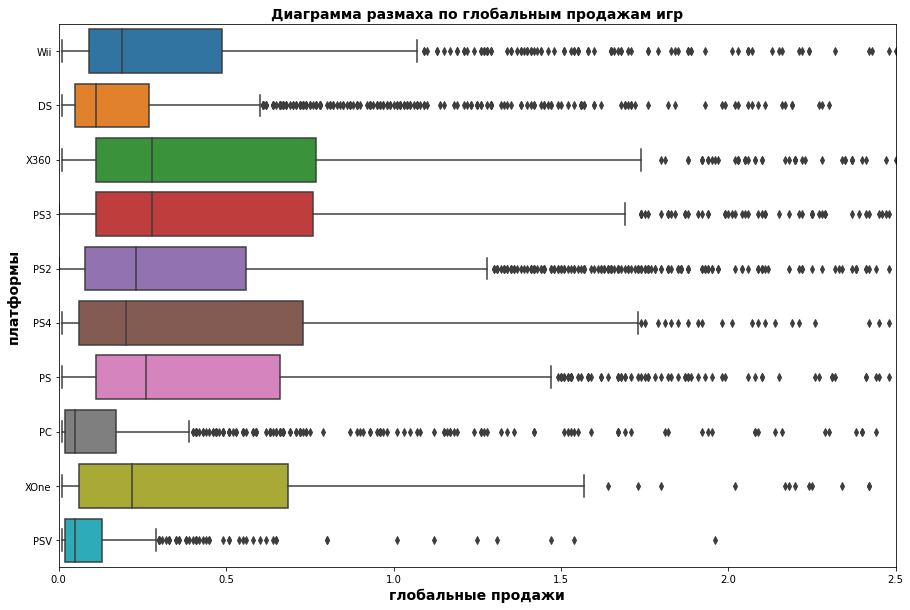

In [ ]:
# диаграмма размаха
plt.figure(figsize=(15,10))
sns.boxplot(data=data_TOP_6_promis_4, x='total_sales', y='platform')
plt.title(label='Диаграмма размаха по глобальным продажам игр', fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)
plt.xlabel("глобальные продажи", fontsize=14, fontweight="bold")
plt.ylabel("платформы", fontsize=14, fontweight="bold");

#### Вывод

1. Диаграмма размаха наглядно отображает самые популярные и прибыльные платформы.
2. Также, на основе диаграммы размаха можно предположить до какого уровня возможен потенциальный рост медианных значений прибыли у развивающихся платформ, находящихся в стадии роста (например PS4, XOne, PC).

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

In [ ]:
# расчет коэффициента корреляции между продажами и оценкой критиков
cor_sales_critic = data.query('platform == "PS2"')[['total_sales', 'critic_score']]
cor_sales_critic.corr()

total_sales  critic_score
total_sales      1.000000      0.392536
critic_score     0.392536      1.000000

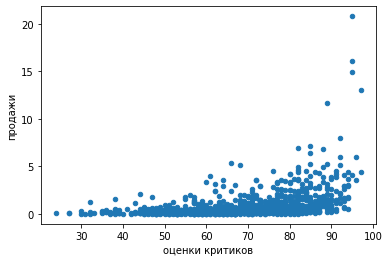

In [ ]:
# диаграмма рассеяния
cor_sales_critic.plot.scatter(y='total_sales', x='critic_score')
plt.xlabel("оценки критиков")
plt.ylabel("продажи");

In [ ]:
# расчет коэффициента корреляции между продажами и оценкой пользователей
cor_sales_user = data.query('platform == "PS2"')[['total_sales', 'user_score']]
cor_sales_user.corr()

total_sales  user_score
total_sales     1.000000    0.175055
user_score      0.175055    1.000000

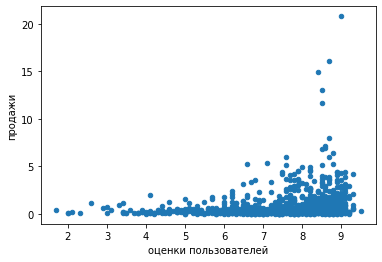

In [ ]:
# диаграмма рассеяния
cor_sales_user.plot.scatter(y='total_sales', x='user_score')
plt.xlabel("оценки пользователей")
plt.ylabel("продажи");

#### Вывод

1. Между продажами и оценкой критиков существует несильная положительная корреляция порядка 0.39, которую мы не принимаем во внимание, так как она попадает в диапазон от -0,5 до +0,5.
2. Между продажами и оценкой пользователей не существует значимой взаимосвязи.

In [ ]:
# вывод листа TOP-10
list_top_10

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

In [ ]:
# функция подсчета корреляции между продажами и отзывами (критиков и пользователей) по платформам
def cor_sales_score(list_top):
    for list in list_top:
        print(list)
        df = data.query('platform == list')
        print(df[['total_sales', 'critic_score']].corr())
        print(df[['total_sales', 'user_score']].corr())
        print('_______________________________________')

In [ ]:
cor_sales_score(list_top_10)

PS2
              total_sales  critic_score
total_sales      1.000000      0.392536
critic_score     0.392536      1.000000
             total_sales  user_score
total_sales     1.000000    0.175055
user_score      0.175055    1.000000
_______________________________________
X360
              total_sales  critic_score
total_sales      1.000000      0.392866
critic_score     0.392866      1.000000
             total_sales  user_score
total_sales     1.000000    0.114187
user_score      0.114187    1.000000
_______________________________________
PS3
              total_sales  critic_score
total_sales      1.000000      0.432759
critic_score     0.432759      1.000000
             total_sales  user_score
total_sales     1.000000    0.128416
user_score      0.128416    1.000000
_______________________________________
Wii
              total_sales  critic_score
total_sales      1.000000      0.177907
critic_score     0.177907      1.000000
             total_sales  user_score
total_sales  

#### Вывод

1. В целом, наличие взаимосвязи между продажами и оценкой критиков на других платформах также не подтвердилось, как и на самой прибыльной платформе - "PS2" (за указанный период времени).
2. Отсутствие наличия значимой взаимосвязи между продажами и оценкой пользователей, на других платформах также подтвердилось.

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами

#### Период с 2013 по 2016

In [ ]:
data_promis

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16432               Strawberry Nauts      PSV             2016     Adventure   
16436               Aiyoku no Eustia      PSV             2014          Misc   
16439  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16441        Haitaka no Psychedelica      PSV             2016     Adventure   
16443            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
42         3.96      6.31      0.38         1.97          97.0         8.3   
...         ...       ...       ...          ...           ...         ...   
16432      0.00      0.00      0.01         0.00           NaN         NaN   
16436      0.00      0.00      0.01         0.00           NaN         NaN   
16439      0.00      0.00      0.01         0.00           NaN         NaN   
16441      0.00      0.00      0.01         0.00           NaN         NaN   
16443      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
16           M        21.05  
23           M        16.27  
31     unknown        14.63  
33     unknown        14.60  
42           M        12.62  
...        ...          ...  
16432  unknown         0.01  
16436  unknown         0.01  
16439  unknown         0.01  
16441  unknown         0.01  
16443  unknown         0.01  

[2233 rows x 12 columns]

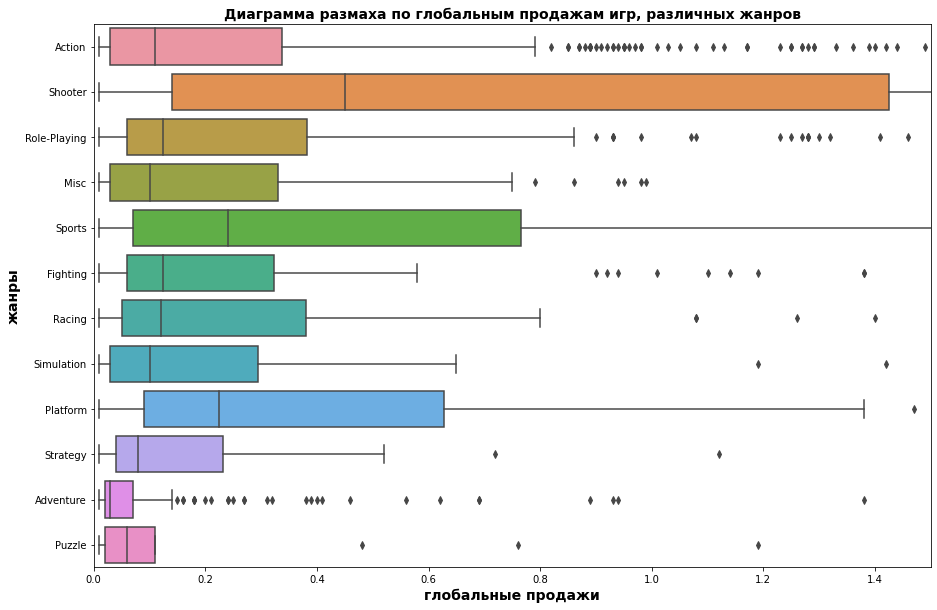

In [ ]:
# диаграмма размаха
plt.figure(figsize=(15,10))
sns.boxplot(data=data_promis, x='total_sales', y='genre')
plt.title(label='Диаграмма размаха по глобальным продажам игр, различных жанров', fontsize=14, fontweight="bold")
plt.xlim(0, 1.5)
plt.xlabel("глобальные продажи", fontsize=14, fontweight="bold")
plt.ylabel("жанры", fontsize=14, fontweight="bold");

In [ ]:
# формируем сводную таблицу
data_pivot_genre = data_promis.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'sum')

In [ ]:
# переименование столбцов сводной таблицы
data_pivot_genre.columns = ['']

In [ ]:
# вывод отсортированного списка
data_pivot_genre = data_pivot_genre.sort_values(by='', ascending=False)
data_pivot_genre

genre               
Action        321.87
Shooter       232.98
Sports        150.65
Role-Playing  145.89
Misc           62.82
Platform       42.63
Racing         39.89
Fighting       35.31
Adventure      23.64
Simulation     21.76
Strategy       10.08
Puzzle          3.17

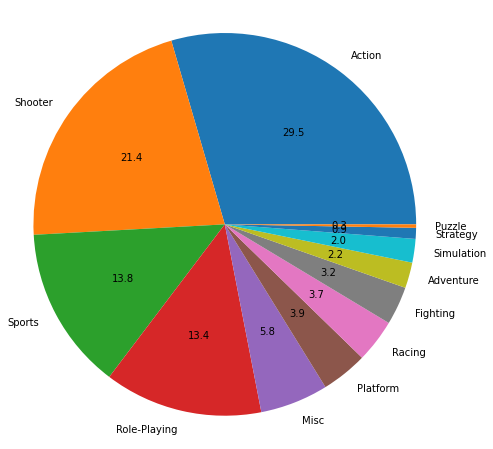

In [ ]:
# круговая диаграмма распределения жанров в процентном соотношении
data_pivot_genre[''].plot(kind='pie', figsize=(8, 8), autopct='%.1f', radius = 1.1);

In [ ]:
# формируем сводную таблицу
data_pivot_genre = data_promis.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'median')

In [ ]:
# переименование столбцов сводной таблицы
data_pivot_genre.columns = ['']

In [ ]:
# вывод отсортированного списка
data_pivot_genre = data_pivot_genre.sort_values(by='', ascending=False)
data_pivot_genre

genre              
Shooter       0.450
Sports        0.240
Platform      0.225
Fighting      0.125
Role-Playing  0.125
Racing        0.120
Action        0.110
Misc          0.100
Simulation    0.100
Strategy      0.080
Puzzle        0.060
Adventure     0.030

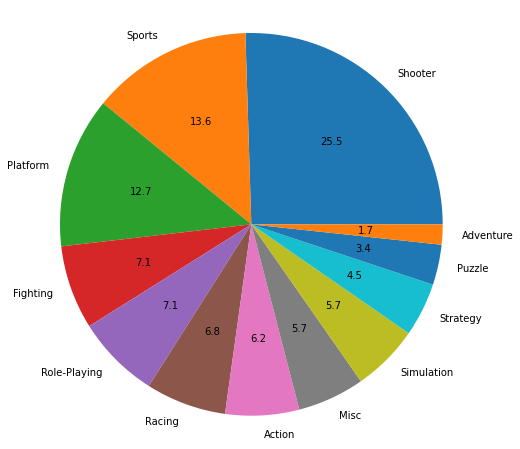

In [ ]:
# круговая диаграмма распределения жанров в процентном соотношении
data_pivot_genre[''].plot(kind='pie', figsize=(8, 8), autopct='%.1f', radius = 1.1);

##### Вывод

За период с 2013 по 2016:
1. Самый суммарноприбыльный жанр Action порядка 30% от общего числа
2. Самый не суммарноприбыльный жанр Puzzle менее 1% от общего числа
3. В тройку самых суммарноприбыльный жанров, занимающих порядка 70% от общего числа, входят:
    *   Action
    *   Shooter
    *   Sports
    
Кроме того, анализ медианных значений прибыли каждого жанра и диаграммы размаха показал следующее:

4. Самый медианноприбыльный жанр Shooter порядка 26% от общего числа
5. Самый не медианноприбыльный жанр Adventure порядка 2% от общего числа
6. В тройку самых медианноприбыльный жанров, занимающих порядка 52% от общего числа, входят:
    *   Shooter
    *   Sports
    *   Platform

#### Актуальный период

In [ ]:
data_actual = data_promis.query('year_of_release == 2016')

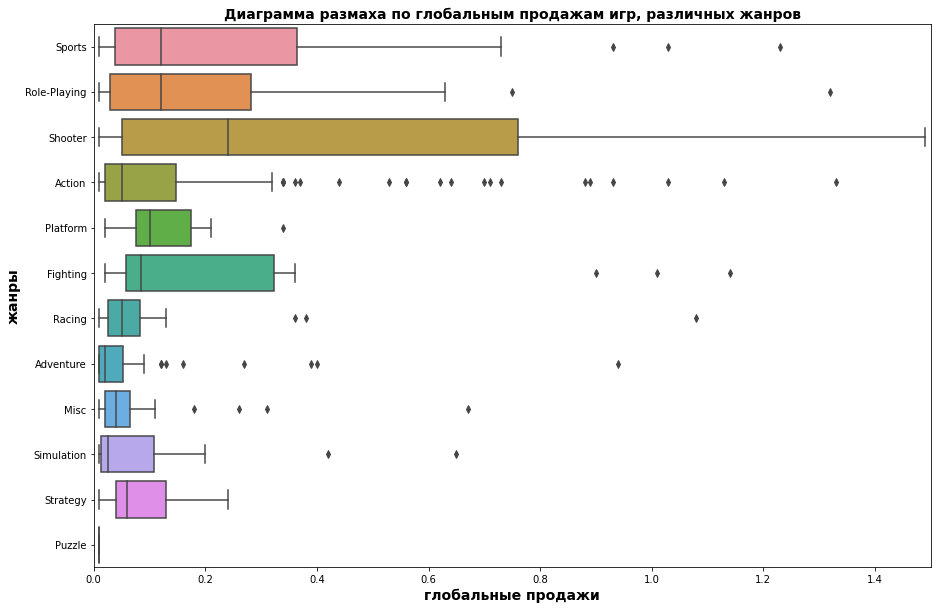

In [ ]:
# диаграмма размаха
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual, x='total_sales', y='genre')
plt.title(label='Диаграмма размаха по глобальным продажам игр, различных жанров', fontsize=14, fontweight="bold")
plt.xlim(0, 1.5)
plt.xlabel("глобальные продажи", fontsize=14, fontweight="bold")
plt.ylabel("жанры", fontsize=14, fontweight="bold");

In [ ]:
# формируем сводную таблицу
data_pivot_genre = data_actual.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'sum')

In [ ]:
# переименование столбцов сводной таблицы
data_pivot_genre.columns = ['']

In [ ]:
# вывод отсортированного списка
data_pivot_genre = data_pivot_genre.sort_values(by='', ascending=False)
data_pivot_genre

genre              
Shooter       38.22
Action        30.11
Sports        23.49
Role-Playing  18.18
Fighting       4.47
Adventure      3.82
Platform       3.23
Racing         2.79
Misc           2.60
Simulation     1.89
Strategy       1.13
Puzzle         0.01

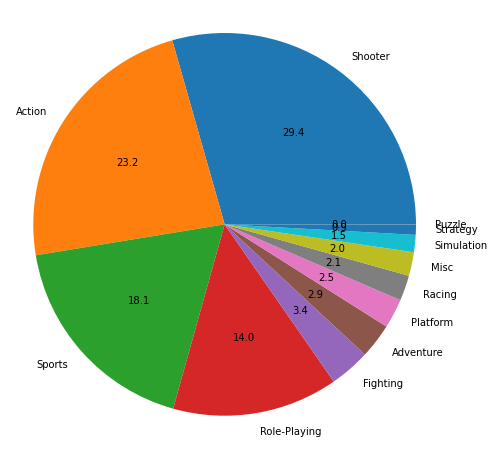

In [ ]:
# круговая диаграмма распределения жанров в процентном соотношении
data_pivot_genre[''].plot(kind='pie', figsize=(8, 8), autopct='%.1f', radius = 1.1);

In [ ]:
# формируем сводную таблицу
data_pivot_genre = data_actual.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'median')

In [ ]:
# переименование столбцов сводной таблицы
data_pivot_genre.columns = ['']

In [ ]:
# вывод отсортированного списка
data_pivot_genre = data_pivot_genre.sort_values(by='', ascending=False)
data_pivot_genre

genre              
Shooter       0.240
Role-Playing  0.120
Sports        0.120
Platform      0.100
Fighting      0.085
Strategy      0.060
Action        0.050
Racing        0.050
Misc          0.040
Simulation    0.025
Adventure     0.020
Puzzle        0.010

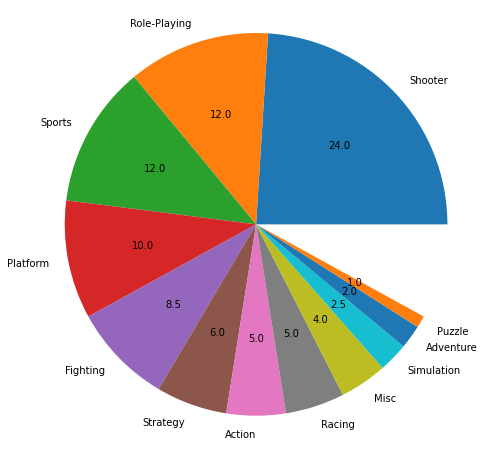

In [ ]:
# круговая диаграмма распределения жанров в процентном соотношении
data_pivot_genre[''].plot(kind='pie', figsize=(8, 8), autopct='%.1f', radius = 1.1);

##### Вывод

За актуальный период:
1. Самый популярный жанр Shooter порядка 29% от общего числа
2. Самый не популярный жанр Puzzle менее 1% от общего числа
3. В тройку самых популярных жанров, занимающих порядка 71% от общего числа, входят:
    *   Shooter
    *   Action
    *   Sports

Кроме того, анализ медианных значений прибыли каждого жанра и диаграммы размаха показал следующее:

4. Самый медианноприбыльный жанр Shooter порядка 24% от общего числа
5. Самый не медианноприбыльный жанр Puzzle порядка 1% от общего числа
6. В тройку самых медианноприбыльный жанров, занимающих порядка 48% от общего числа, входят:
    *   Shooter
    *   Role-Playing
    *   Sports

#### Вывод

1. В целом, необходимо отметить, что в тройку самых суммарноприбыльных жанров как в актуальный период, так и в период с 2013 по 2016, входят:

    *   Action
    *   Shooter
    *   Sports
    
   Так же установлено, что постоянными участниками тройки самых медианноприбыльный жанров как в актуальный период, так и в    период с 2013 по 2016, являются:

    *   Shooter
    *   Sports

   что касается третьего участника (самых медианноприбыльных жанров) он не стабилен и в разное время это были:
    
    *   Platform
    *   Role-Playing
        
2. Отсутствие Action в тройке самых медианноприбыльных жанров, говорит о том, что он свое лидерство по суммарной прибыли взял лишь количеством.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [ ]:
# формируем лист регионов
list_region =['na_sales', 'eu_sales', 'jp_sales']

In [ ]:
# функция подсчет TOP-5 платформ по регионам
def top_5(list_reg):
    top_5_total = pd.DataFrame()   
    for region in list_reg:
        df = data_promis.pivot_table(index = ['platform'], values = region, aggfunc = 'sum')
        df_sort = df.sort_values(by=region, ascending=False).head(5)
        top_5_total = pd.concat([top_5_total, df_sort], sort=False)
        top_5_total = top_5_total.fillna(0)
    top_5_total = top_5_total.pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
    top_5_total['total_sales_region'] = top_5_total['na_sales'] + top_5_total['eu_sales'] + top_5_total['jp_sales']
    top_5_total = top_5_total.sort_values(by='total_sales_region', ascending=False).head(5)
    return top_5_total

In [ ]:
df_top_5 = top_5(list_region)

eu_sales  jp_sales  na_sales  total_sales_region
platform                                                  
PS4         141.09     15.96    108.74              265.79
PS3          67.81     23.35     63.50              154.66
XOne         51.59      0.00     93.12              144.71
3DS          30.96     67.81     38.20              136.97
X360         42.52      0.00     81.66              124.18

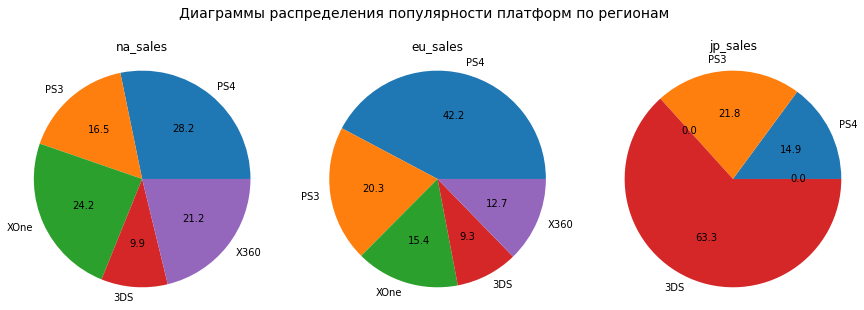

In [ ]:
display(df_top_5)
print()
plt.suptitle("Диаграммы распределения популярности платформ по регионам", fontsize=14)
plt.subplot(1, 3, 1)
df_top_5['na_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='na_sales')

plt.subplot(1, 3, 2)
df_top_5['eu_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='eu_sales')

plt.subplot(1, 3, 3)
df_top_5['jp_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='jp_sales')
plt.show()

#### Вывод

1. Платформа PS4 занимает первое место, ее популярность в регионах составляет:
    *   первое место в "na" регионе, доля продаж - 28.2%
    *   первое место в "eu" регионе, доля продаж - 42.2%
    *   третье место в "jp" регионе, доля продаж - 14.9%
2. Платформа PS3 занимает второе место, ее популярность в регионах составляет:
    *   четвертое место в "na" регионе, доля продаж - 16.5%
    *   второе место в "eu" регионе, доля продаж - 20.3%
    *   второе место в "jp" регионе, доля продаж - 21.8%
3. Платформа XOne занимает третье место, ее популярность в регионах составляет:
    *   второе место в "na" регионе, доля продаж - 24.2%
    *   третье место в "eu" регионе, доля продаж - 15.4%

### Самые популярные жанры (топ-5)

In [ ]:
# функция подсчет TOP-5 жанров по регионам
def top_5_genre(list_reg):
    top_5_total = pd.DataFrame()   
    for region in list_reg:
        df = data_promis.pivot_table(index = ['genre'], values = region, aggfunc = 'sum')
        df_sort = df.sort_values(by=region, ascending=False).head(5)
        top_5_total = pd.concat([top_5_total, df_sort], sort=False)
        top_5_total = top_5_total.fillna(0)
    top_5_total = top_5_total.pivot_table(index = ['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
    top_5_total['total_sales_region'] = top_5_total['na_sales'] + top_5_total['eu_sales'] + top_5_total['jp_sales']
    top_5_total = top_5_total.sort_values(by='total_sales_region', ascending=False).head(5)
    return top_5_total

In [ ]:
df_top_5 = top_5_genre(list_region)

eu_sales  jp_sales  na_sales  total_sales_region
genre                                                         
Action          118.13     40.49    126.05              284.67
Shooter          87.86      6.61    109.74              204.21
Role-Playing     36.97     51.04     46.40              134.41
Sports           60.52      0.00     65.27              125.79
Misc              0.00      9.20     27.49               36.69

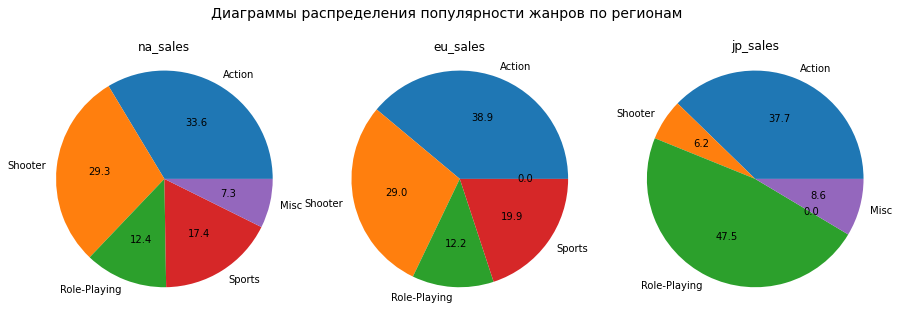

In [ ]:
display(df_top_5)
print()
plt.suptitle("Диаграммы распределения популярности жанров по регионам", fontsize=14)
plt.subplot(1, 3, 1)
df_top_5['na_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='na_sales')

plt.subplot(1, 3, 2)
df_top_5['eu_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='eu_sales')

plt.subplot(1, 3, 3)
df_top_5['jp_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='jp_sales')
plt.show()

#### Вывод

1. Жанр Action как самый популярный занимает лидирующие места по всем регионам, а именно:
    *   первое место в "na" регионе, доля продаж - 33.6%
    *   первое место в "eu" регионе, доля продаж - 38.9%
    *   второе место в "jp" регионе, доля продаж - 37.7%
2. Жанр Shooter занимает второе место по популярности в регионах, а именно:
    *   второе место в "na" регионе, доля продаж - 29.3%
    *   второе место в "eu" регионе, доля продаж - 29.0%
    *   четвертое место в "jp" регионе, доля продаж - 6.2%
3. Жанр Role-Playing занимает третье место по популярности в регионах, а именно:
    *   четвертое место в "na" регионе, доля продаж - 12.4%
    *   четвертое место в "eu" регионе, доля продаж - 12.2%
    *   первое место в "jp" регионе, доля продаж - 47.5%

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

#### Корреляционный анализ

Для подсчета корреляции между рейтингом ESRB и продажами в отдельном регионе, переведем номинативную шкалу ESRB в числовую. Присвоим каждому буквенному значению рейтинга - числовое, соответствующее возрасту из источника: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [ ]:
# вывод уникальных значений
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [ ]:
# формируем новый столбец
data['num_rating'] = data['rating']

In [ ]:
# замена номинативных значений числовыми
data['num_rating'].where(~(data.num_rating == 'E'), other=6, inplace=True)
data['num_rating'].where(~(data.num_rating == 'K-A'), other=6, inplace=True)
data['num_rating'].where(~(data.num_rating == 'M'), other=17, inplace=True)
data['num_rating'].where(~(data.num_rating == 'T'), other=13, inplace=True)
data['num_rating'].where(~(data.num_rating == 'E10+'), other=10, inplace=True)
data['num_rating'].where(~(data.num_rating == 'AO'), other=18, inplace=True)
data['num_rating'].where(~(data.num_rating == 'EC'), other=3, inplace=True)
data['num_rating'].where(~(data.num_rating == 'unknown'), other=0, inplace=True)
data['num_rating'].where(~(data.num_rating == 'RP'), other=0, inplace=True)

In [ ]:
# приведение столбца к типу 'int'
data['num_rating'] = data['num_rating'].astype('int')

In [ ]:
# функция подсчета корреляции между продажами и отзывами (критиков и пользователей) по платформам
def cor_sales_num_rating(list_reg):
    for region in list_reg:
        print(region)
        print(data[[region, 'num_rating']].corr())
        print('________________________________')


In [ ]:
cor_sales_num_rating(list_region)

na_sales
            na_sales  num_rating
na_sales    1.000000    0.083349
num_rating  0.083349    1.000000
________________________________
eu_sales
            eu_sales  num_rating
eu_sales    1.000000    0.098459
num_rating  0.098459    1.000000
________________________________
jp_sales
            jp_sales  num_rating
jp_sales    1.000000   -0.108276
num_rating -0.108276    1.000000
________________________________


 #### Круговые диаграммы распределения по регионам

In [ ]:
# функция подсчет TOP-5 ESRB
def top_esrb_rating(list_reg):
    top_5_total = pd.DataFrame()   
    for region in list_reg:
        df = data_promis.pivot_table(index = ['rating'], values = region, aggfunc = 'sum')
        df_sort = df.sort_values(by=region, ascending=False).head(5)
        top_5_total = pd.concat([top_5_total, df_sort], sort=False)
        top_5_total = top_5_total.fillna(0)
    top_5_total = top_5_total.pivot_table(index = ['rating'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
    top_5_total['total_sales_region'] = top_5_total['na_sales'] + top_5_total['eu_sales'] + top_5_total['jp_sales']
    top_5_total = top_5_total.sort_values(by='total_sales_region', ascending=False).head(5)
    return top_5_total

In [ ]:
df_top_5 = top_esrb_rating(list_region)

eu_sales  jp_sales  na_sales  total_sales_region
rating                                                   
M          145.32     14.11    165.21              324.64
unknown     78.91     85.05     89.42              253.38
E           83.36     15.14     79.05              177.55
T           41.95     20.59     49.79              112.33
E10+        42.69      5.89     54.24              102.82

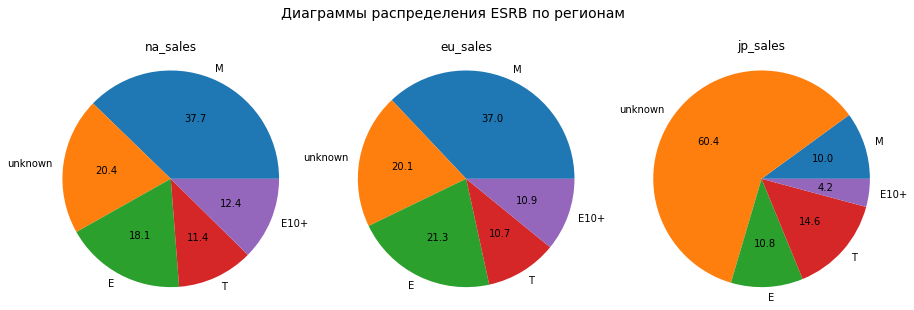

In [ ]:
display(df_top_5)
print()
plt.suptitle("Диаграммы распределения ESRB по регионам", fontsize=14)
plt.subplot(1, 3, 1)
df_top_5['na_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='na_sales')

plt.subplot(1, 3, 2)
df_top_5['eu_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='eu_sales')

plt.subplot(1, 3, 3)
df_top_5['jp_sales'].plot(kind='pie', figsize=(15, 5), autopct='%.1f', radius = 1.1, ylabel='', title='jp_sales')
plt.show()

#### Вывод

А. Исходя их корреляционного анализа статистически значимой взаимосвязи между рейтингом ESRB и продажами в отдельном регионе не обнаружено.

Б. Однако, анализ круговых диаграмм распределения значений рейтинга ESRB по регионам, показал следующее:

1. Больше всего прибыли приносят игры со значением рейтинга "M" («Для взрослых» от 17 лет), лидирующим по всем регионам, а именно:
    *   первое место в "na" регионе, доля продаж - 37.7%
    *   первое место в "eu" регионе, доля продаж - 30.0%
    *   четвертое место в "jp" регионе, доля продаж - 10.0%
2. Игры со значением рейтинга "unknown" занимают второе место по популярности в регионах, а именно (обусловлено большим количеством пропусков):
    *   второе место в "na" регионе, доля продаж - 20.4%
    *   третье место в "eu" регионе, доля продаж - 20.1%
    *   первое место в "jp" регионе, доля продаж - 60.4%
3. Игры со значением рейтинга "E" («Для всех» - от 6 лет) занимают третье место по популярности в регионах, а именно:
    *   третье место в "na" регионе, доля продаж - 18.1%
    *   второе место в "eu" регионе, доля продаж - 21.3%
    *   третье место в "jp" регионе, доля продаж - 10.8%

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
# срез по платформам
data_XOne = data_promis.query('platform == "XOne"')
data_PC = data_promis.query('platform == "PC"')

In [ ]:
# удаление пропусков
data_XOne = data_XOne.dropna()
data_PC = data_PC.dropna()

In [ ]:
# СПРАВОЧНО: средний пользовательский рейтинг платформы Xbox One
data_XOne['user_score'].mean()

6.538181818181819

In [ ]:
# СПРАВОЧНО: дисперсия
var_data_XOne = data_XOne['user_score'].var()
var_data_XOne

1.7963991130820411

In [ ]:
# СПРАВОЧНО: средний пользовательский рейтинг платформы PC
data_PC['user_score'].mean()

6.302027027027026

In [ ]:
# СПРАВОЧНО: дисперсия
var_data_PC = data_PC['user_score'].var()
var_data_PC

2.9324448428019863

1.   H0: гипотеза о равенстве средних пользовательского рейтинга платформы PC и Xbox One
2.   H1: гипотеза о неравенстве средних пользовательского рейтинга платформы PC и Xbox One
3. Примечание:
*   параметр equal_var = False, так как дисперсии не равны
*   проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
sample_1 = data_XOne['user_score']
sample_2 = data_PC['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


#### Вывод

При условии, что средние пользовательского рейтинга платформы PC и Xbox One равны, вероятность получить такие или еще более выраженные различия составила 0.17882648263401307. Принимаем нулевую гипотезу о равенстве средних пользовательского рейтинга платформы PC и Xbox One.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)

In [ ]:
# срез по жанрам
data_Action = data_promis.query('genre == "Action"')
data_Sports = data_promis.query('genre == "Sports"')

In [ ]:
# удаление пропусков
data_Action = data_Action.dropna()
data_Sports = data_Sports.dropna()

In [ ]:
# СПРАВОЧНО: cредний пользовательский рейтинг платформы Xbox One
data_Action['user_score'].mean()

6.936245954692556

In [ ]:
# СПРАВОЧНО: дисперсия
var_data_Action = data_Action['user_score'].var()
var_data_Action

1.6462144328163717

In [ ]:
# СПРАВОЧНО: cредний пользовательский рейтинг платформы PC
data_Sports['user_score'].mean()

5.665454545454544

In [ ]:
# СПРАВОЧНО: дисперсия
var_data_Sports = data_Sports['user_score'].var()
var_data_Sports

2.1316396997497913

1.   H0: гипотеза о равенстве средних пользовательского рейтинга жанров Action и Sports
2.   H0: гипотеза о неравенстве средних пользовательского рейтинга жанров Action и Sports
3. Примечание:
*   параметр equal_var = False, так как дисперсии не равны
*   проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [ ]:
sample_1 = data_Action['user_score']
sample_2 = data_Sports['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


#### Вывод

При условии, что средние пользовательского рейтинга жанров Action и Sports равны, вероятность получить такие или еще более выраженные различия составила 1.0496920005008588e-13. Отвергаем нулевую гипотезу о равенстве средних пользовательского рейтинга жанров Action и Sports.

## Общий вывод

### В результате предобработки:

1. Изменены названия столбцов (приведите к нижнему регистру).
2. Преобразованы данные в столбце "year_of_release" и "user_score" в тип int64 и float64 соответственно.
3. Удалены пропуски по столбцам "name" и "genre" (доля пропусков менне 1 %).
4. В столбце "rating" заполнены пропуски значением "unknown", так как переменная относится к типу категориальных и доля пропусков порядка 41 %.
5. В столбце "user_score" доля пропусков сначала составляла порядка 54 %.  Обнаруженные значения 'tbd' (to be defined - данные скоро будут обнародованы) были заполнены пропусками "NAN". В результате доля пропусков еще увеличилась на 15 %, однако появилась возможность анализа средних, медианных значений выборки, а также ее частотного распределения. Также необходимо отметить, что внесенные изменения в целом, не повлияли на объективность в данных.
6. В столбце "critic_score" доля пропусков составила порядка 51 %. Медиана больше среднего - распределение смещено влево и имеет нормальный вид, без аномальных выбросов. Оставим данные с пропусками как есть, так как заполнение более 50% средними значениями или нулевыми приведет к сильному искажению формы нормального распределения и, в целом, повлияет на объективность в данных.
7. Добавлен столбец "total_sales" - показывающий суммарные продажи во всех регионах.

### В результате исследовательского анализа данных установлено следующее:

1. На протяжении периода с 1980 по 2008 годы наблюдался рост выпускаемых релизов с 9 до 1427.
2. В период с 2008 по 2016 годы - спад. Количество выпускаемых в год релизов снизилось до 502.
3. Среднее количество релизов, выпускаемых в год составляет порядка 444.
4. В TOP-10 platform с наибольшими суммарными продажами входят:
    *   PS2
    *   X360
    *   PS3
    *   Wii
    *   DS
    *   PS
    *   PS4
    *   GBA
    *   PSP
    *   3DS
5. Среднее количество лет существования платформ - 10.5.
6. Медианное количество лет существования платформ – 10.
7. К платформам, "растущим" по продажам можно отнести:
    *   PS4
    *   XOne
    *   PC
    *   PSV (с 2015 наметилась тенденция к снижению, возможен второй "гребень" роста, однако и возможно, что тенденция "падения" продолжится)
8. К платформам, "падающим" по продажам можно отнести:
    *   PS3
    *   3DS
    *   X360
    *   WiiU
    *   Wii
    *   PSP
9. К потенциально прибыльным платформам можно отнести:
    *   PS4
    *   XOne
    *   PC
10. На основе диаграммы размаха можно предположить до какого уровня возможен потенциальный рост медианных значений прибыли у развивающихся платформ, находящихся в стадии роста (например PS4, XOne, PC).
11. Между продажами и оценкой критиков существует несильная положительная корреляция порядка 0.39, которую мы не принимаем во внимание, так как она попадает в диапазон от -0,5 до +0,5.
12. Между продажами и оценкой пользователей не существует значимой взаимосвязи.
13. Наличие взаимосвязи между продажами и оценкой критиков на других платформах также не подтвердилась, как и на самой прибыльной платформе - "PS2" (за указанный период времени).
14. Отсутствие наличия значимой взаимосвязи между продажами и оценкой пользователей, на других платформах также подтвердилась.
15. За период с 2013 по 2016:
    *   Самый суммарноприбыльный жанр Action порядка 30% от общего числа
    *   Самый не суммарноприбыльный жанр Puzzle менее 1% от общего числа
    *   В тройку самых суммарноприбыльный жанров, занимающих порядка 70% от общего числа, входят:
            *   Action
            *   Shooter
            *   Sports
16. Анализ медианных значений прибыли (за период с 2013 по 2016) каждого жанра и диаграммы размаха показал следующее:
    *   Самый медианноприбыльный жанр Shooter порядка 26% от общего числа
    *   Самый не медианноприбыльный жанр Adventure порядка 2% от общего числа
    *   В тройку самых медианноприбыльный жанров, занимающих порядка 52% от общего числа, входят:
            *   Shooter
            *   Sports
            *   Platform
17. За актуальный период:
    *   Самый популярный жанр Shooter порядка 29% от общего числа
    *   Самый не популярный жанр Puzzle менее 1% от общего числа
    *   В тройку самых суммарноприбыльный жанров, занимающих порядка 71% от общего числа, входят:
            *   Shooter
            *   Action
            *   Sports
18. Анализ медианных значений прибыли (за актуальный период) каждого жанра и диаграммы размаха показал следующее:
    *   Самый медианноприбыльный жанр Shooter порядка 24% от общего числа
    *   Самый не медианноприбыльный жанр Puzzle порядка 1% от общего числа
    *   В тройку самых медианноприбыльный жанров, занимающих порядка 48% от общего числа, входят:
            *   Shooter
            *   Role-Playing
            *   Sports
19. Платформа PS4 (за актуальный период) занимает первое место, ее популярность в регионах составляет:
    *   первое место в "na" регионе, доля продаж - 28.2%
    *   первое место в "eu" регионе, доля продаж - 42.2%
    *   третье место в "jp" регионе, доля продаж - 14.9%
20. Платформа PS3 (за актуальный период) занимает второе место, ее популярность в регионах составляет:
    *   четвертое место в "na" регионе, доля продаж - 16.5%
    *   второе место в "eu" регионе, доля продаж - 20.3%
    *   второе место в "jp" регионе, доля продаж - 21.8%
21. Платформа XOne (за актуальный период) занимает третье место, ее популярность в регионах составляет:
    *   второе место в "na" регионе, доля продаж - 24.2%
    *   третье место в "eu" регионе, доля продаж - 15.4%
22. Жанр Action (за актуальный период) как самый популярный занимает лидирующие места по всем регионам, а именно:
    *   первое место в "na" регионе, доля продаж - 33.6%
    *   первое место в "eu" регионе, доля продаж - 38.9%
    *   второе место в "jp" регионе, доля продаж - 37.7%
23. Жанр Shooter (за актуальный период) занимает второе место по популярности в регионах, а именно:
    *   второе место в "na" регионе, доля продаж - 29.3%
    *   второе место в "eu" регионе, доля продаж - 29.0%
    *   четвертое место в "jp" регионе, доля продаж - 6.2%
24. Жанр Role-Playing (за актуальный период) занимает третье место по популярности в регионах, а именно:
    *   четвертое место в "na" регионе, доля продаж - 12.4%
    *   четвертое место в "eu" регионе, доля продаж - 12.2%
    *   первое место в "jp" регионе, доля продаж - 47.5%
25. Исходя их корреляционного анализа статистически значимой взаимосвязи между рейтингом ESRB и продажами в отдельном регионе не обнаружено.
26. Больше всего прибыли приносят игры со значением рейтинга "M" («Для взрослых» от 17 лет), лидирующим по всем регионам, а именно:
    *   первое место в "na" регионе, доля продаж - 37.7%
    *   первое место в "eu" регионе, доля продаж - 30.0%
    *   четвертое место в "jp" регионе, доля продаж - 10.0%
27. Игры со значением рейтинга "unknown" занимают второе место (обусловлено большим количеством пропусков) по популярности в регионах, а именно:
    *   второе место в "na" регионе, доля продаж - 20.4%
    *   третье место в "eu" регионе, доля продаж - 20.1%
    *   первое место в "jp" регионе, доля продаж - 60.4%
28. Игры со значением рейтинга "E" («Для всех» - от 6 лет) занимают третье место по популярности в регионах, а именно:
    *   третье место в "na" регионе, доля продаж - 18.1%
    *   второе место в "eu" регионе, доля продаж - 21.3%
    *   третье место в "jp" регионе, доля продаж - 10.8%

### Проверка гипотез показала следующее:
1. Принимаем нулевую гипотезу о равенстве средних пользовательского рейтинга платформы PC и Xbox One.
2. Отвергаем нулевую гипотезу о равенстве средних пользовательского рейтинга жанров Action и Sports.
